In [1]:
import pandas as pd
import numpy as np

import glob
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
import numpy as np

import matplotlib.pyplot as plt

from modules.utilities import *
from modules.constants import *

plt.rcParams.update(mpl_params)
TOPIC_DIR = "./Outputs/BERTopic/Topics"

In [2]:
names = []
values = []

for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        count = len(df)
        names.append(topic_map[topic_name])
        values.append(count)

summary_df = pd.DataFrame({
    "Topic": names,
    "Count": values
})

summary_df["Parcent"] = (summary_df["Count"] / summary_df["Count"].sum()) * 100
summary_df = summary_df.sort_values("Count", ascending=False)

names = summary_df["Topic"].values
values = summary_df["Count"].values
percentages = summary_df["Parcent"].values

In [3]:
summary_df

,Topic,Count,Parcent
26,CI/CD,96,8.571429
11,Transpiler Benchmarking,56,5.000000
23,Rendering and Data Loading,51,4.553571
6,Timeout and Concurrency,43,3.839286
21,Sequence Data Processing,40,3.571429
31,Join Query,35,3.125000
22,Dependency Management,32,2.857143
24,Network Call Optimization,32,2.857143
37,Performance Benchmarking,30,2.678571
47,Memory Leak,28,2.500000


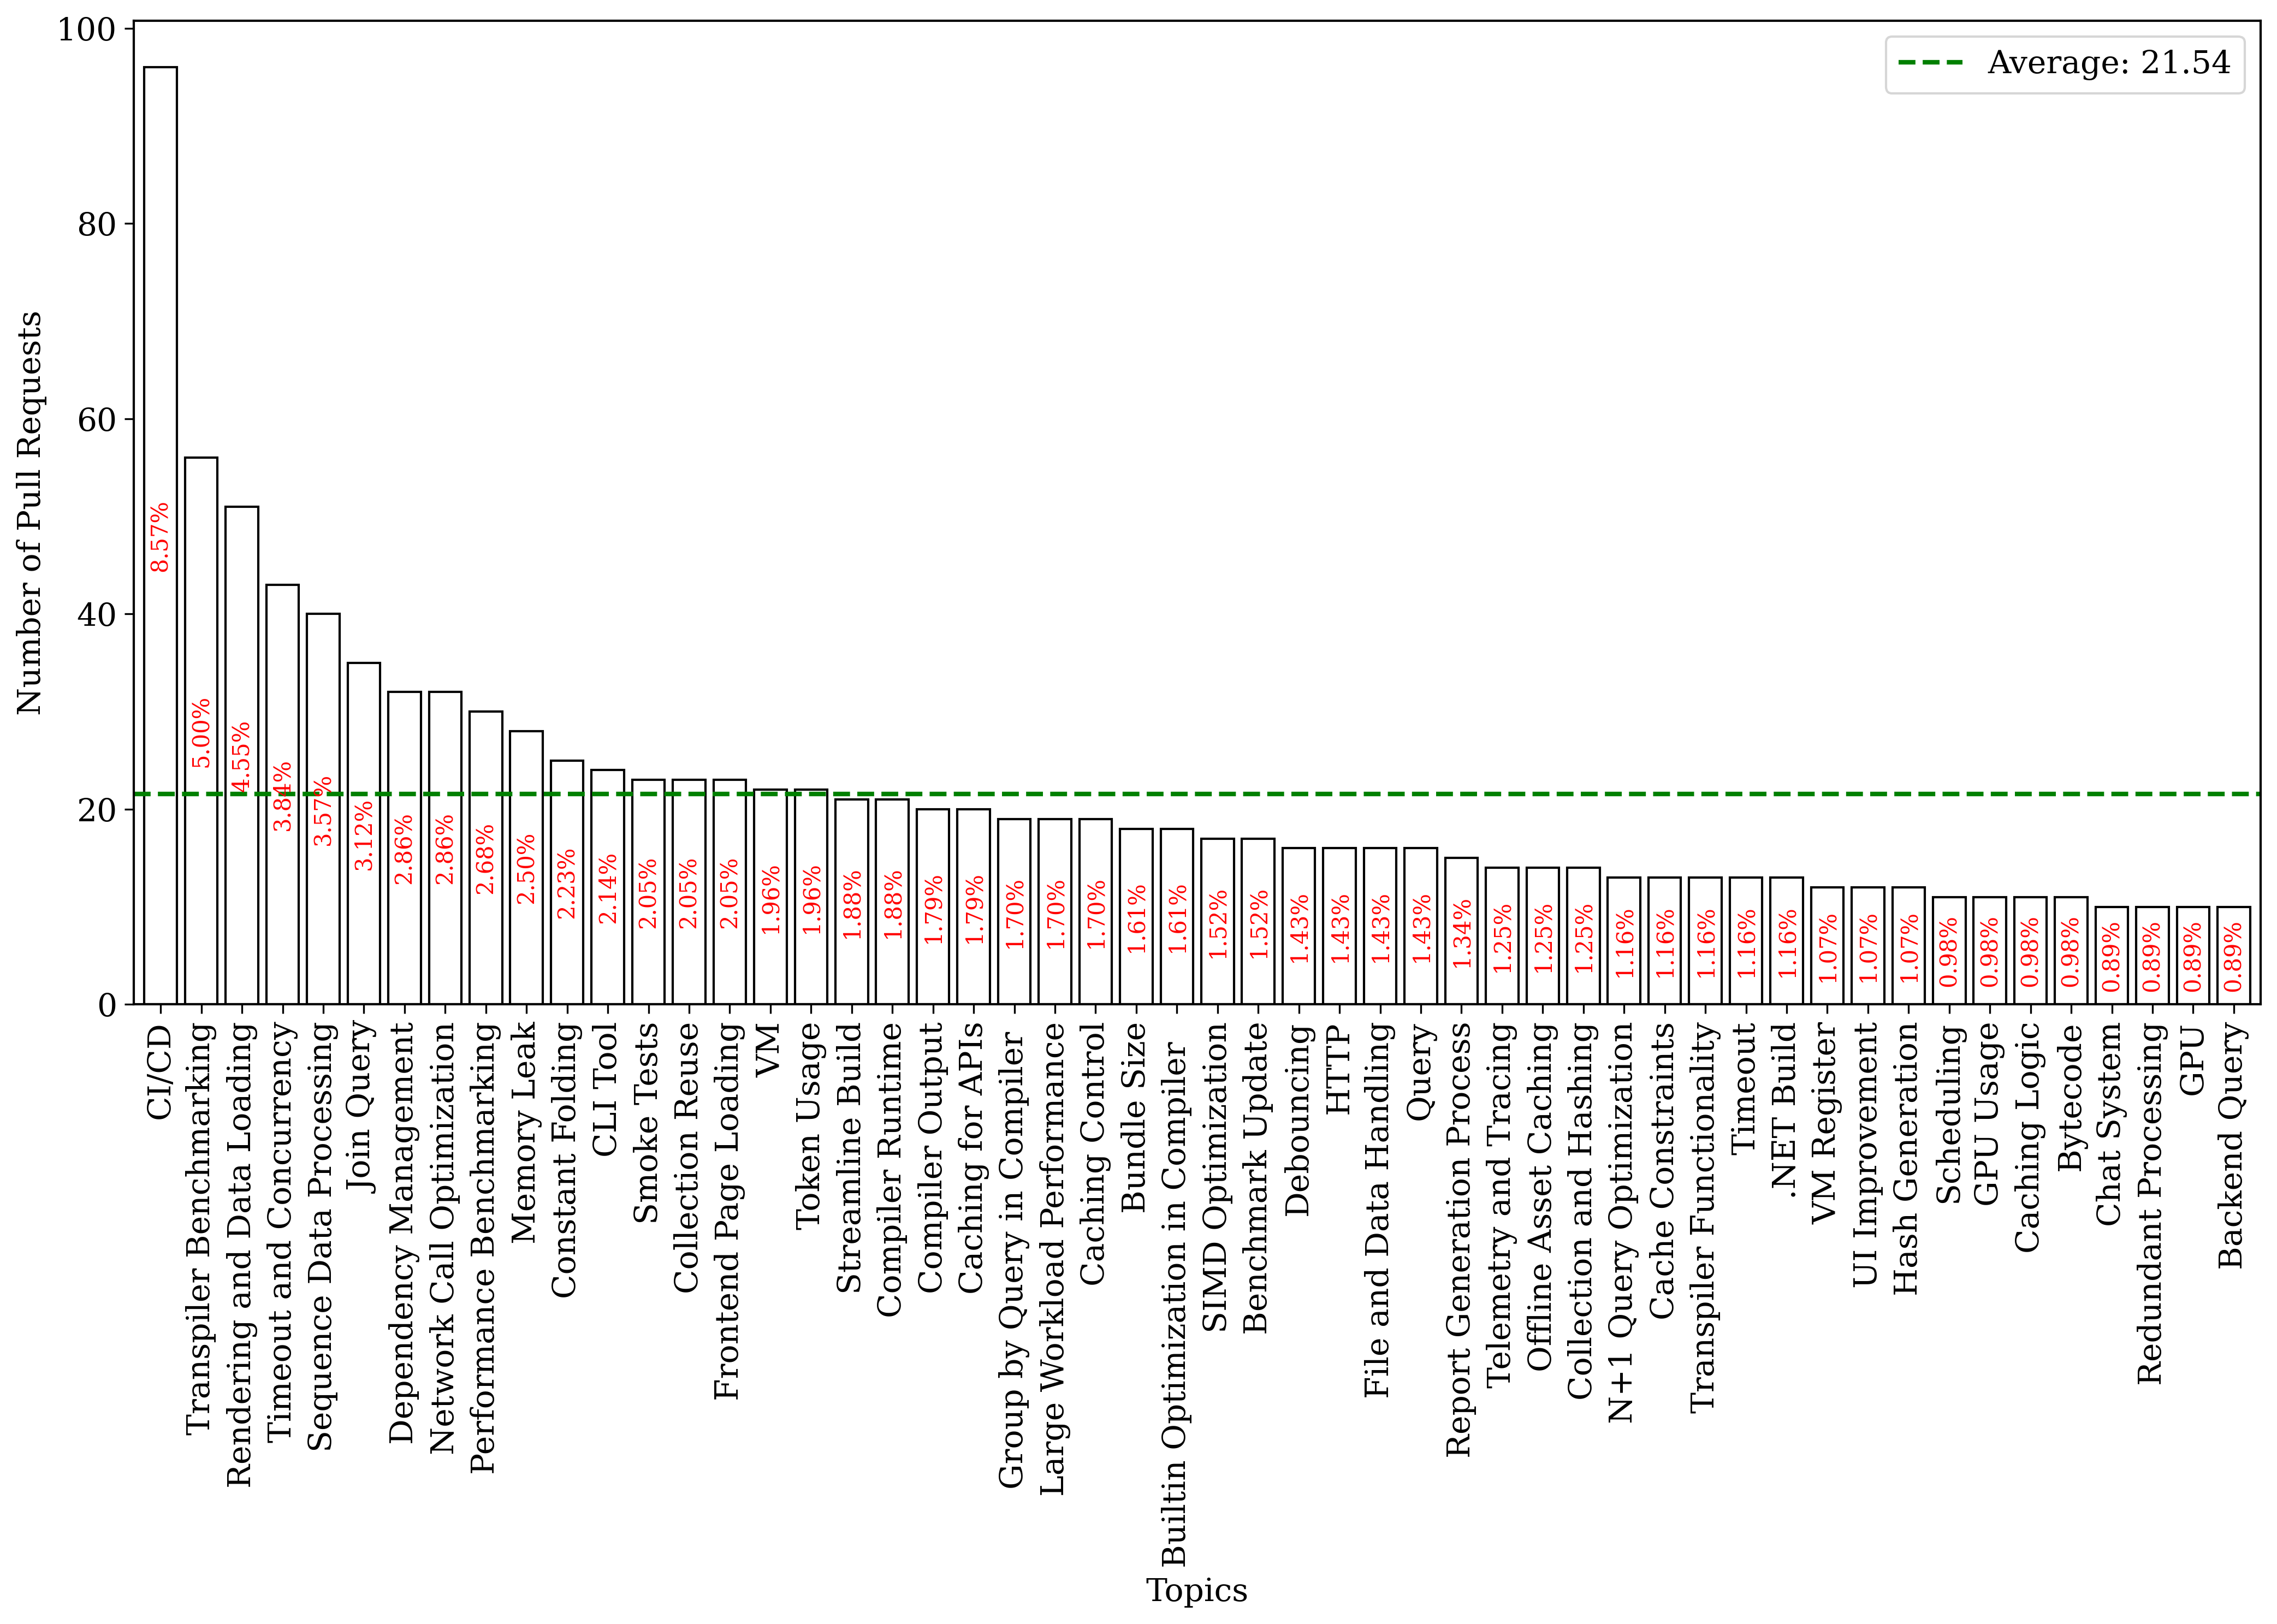

In [4]:
avg_value = np.mean(values)

fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.bar(names, values, color="white", edgecolor="black")

# Add percentage text in the middle of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2.,
            f'{percentage:.2f}%',
            ha='center', va='center', color="red", rotation=90)

ax.axhline(avg_value, color="green", linestyle="--", linewidth=2, label=f"Average: {avg_value:.2f}")
ax.set_ylabel("Number of Pull Requests")
ax.set_xlabel("Topics")
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0.005, tight=True)
plt.tight_layout()
plt.show()


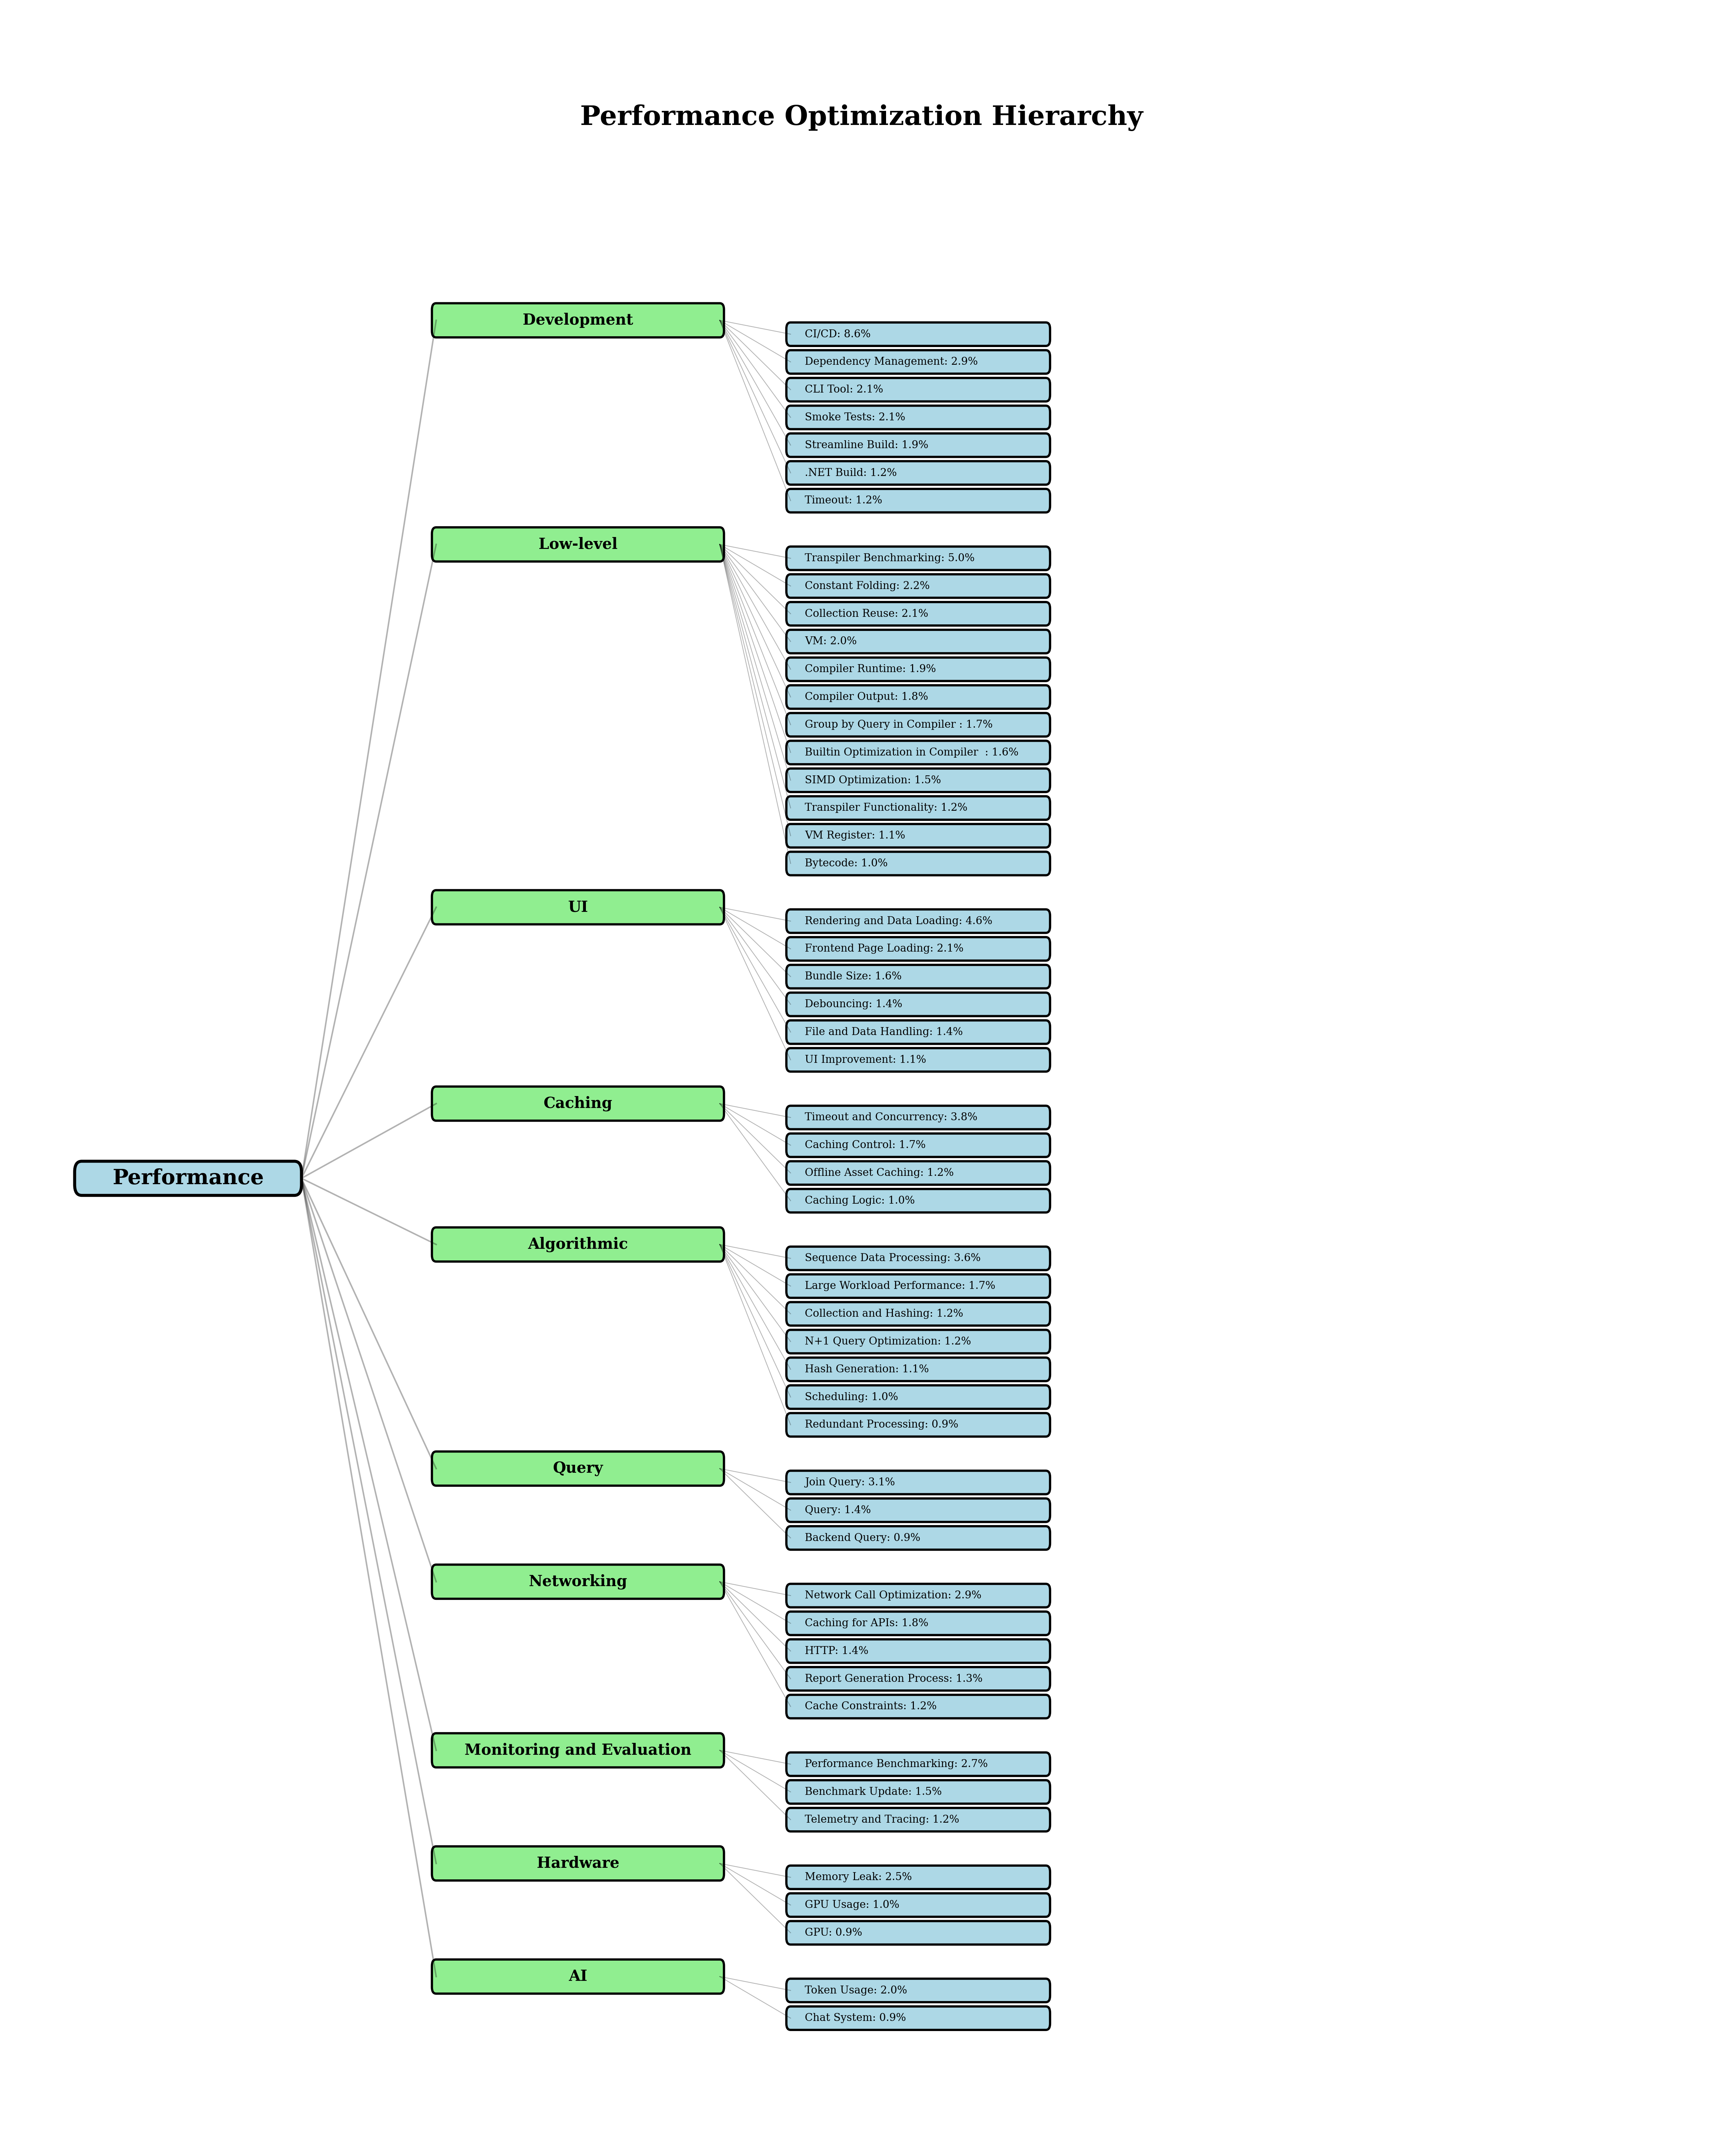

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# =========================
# FIGURE SETUP
# =========================
fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# =========================
# TITLE
# =========================
ax.text(
    6, 9.5,
    'Performance Optimization Hierarchy',
    ha='center',
    va='center',
    fontsize=18,
    fontweight='bold'
)

# =========================
# ROOT NODE
# =========================
root_box = FancyBboxPatch(
    (0.5, 4.5),
    1.5,
    0.06,
    boxstyle="round,pad=0.05",
    edgecolor='black',
    facecolor='lightblue',
    linewidth=2
)
ax.add_patch(root_box)

ax.text(
    1.25, 4.53,
    'Performance',
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold'
)

# =========================
# DATA
# =========================
topic_percentages = dict(
    zip(summary_df['Topic'], summary_df['Parcent'])
)

# =========================
# LAYOUT CONSTANTS
# =========================
topic_spacing = 0.13
topic_box_height = 0.05

category_box_height = 0.1
category_topic_gap = 0.04
category_padding = 0.0

cat_x = 3.0
topic_x = 5.5

# =========================
# CALCULATE CATEGORY POSITIONS
# =========================
current_y = 8.5
category_positions = {}

for category, topics in category_map.items():
    n_topics = len(topics)

    required_height = (
        n_topics * topic_spacing
        + category_box_height
        + category_topic_gap
        + category_padding
    )

    category_positions[category] = current_y
    current_y -= required_height

# =========================
# DRAW CATEGORIES AND TOPICS
# =========================
for category, topics in category_map.items():
    cat_y = category_positions[category]

    # ---- Category Box ----
    cat_box = FancyBboxPatch(
        (cat_x, cat_y),
        2,
        category_box_height,
        boxstyle="round,pad=0.03",
        edgecolor='black',
        facecolor='lightgreen',
        linewidth=1.5
    )
    ax.add_patch(cat_box)

    ax.text(
        cat_x + 1.0,
        cat_y + category_box_height / 2,
        category,
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

    # ---- Root → Category Connector ----
    ax.plot(
        [2.05, cat_x],
        [4.53, cat_y + category_box_height / 2],
        'k-',
        linewidth=1,
        alpha=0.3
    )

    # ---- Topics ----
    topic_start_y = cat_y - category_topic_gap

    for j, topic_key in enumerate(topics):
        topic_name = topic_map[topic_key]
        percentage = topic_percentages.get(topic_name, 0)

        topic_y = topic_start_y - j * topic_spacing

        topic_box = FancyBboxPatch(
            (topic_x, topic_y),
            1.8,
            topic_box_height,
            boxstyle="round,pad=0.03",
            edgecolor='black',
            facecolor='lightblue',
            linewidth=1.5
        )
        ax.add_patch(topic_box)

        # ---- Category → Topic Connector ----
        ax.plot(
            [cat_x + 2.0, topic_x],
            [cat_y + category_box_height / 2,
             topic_y + topic_box_height / 2],
            'k-',
            linewidth=0.5,
            alpha=0.3
        )

        # ---- Topic Label ----
        ax.text(
            topic_x + 0.1,
            topic_y + topic_box_height / 2,
            f'{topic_name}: {percentage:.1f}%',
            ha='left',
            va='center',
            fontsize=7
        )

# =========================
# FINALIZE
# =========================
plt.tight_layout()
plt.show()
